___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [47]:
df = pd.read_csv('../Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)

In [48]:
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [49]:
df['Value'] = df['TRFVOLUSM227NFWA']

In [50]:
df.index.freq = 'MS'

In [51]:
df.head()

,TRFVOLUSM227NFWA,Value
DATE,,
1970-01-01,80173.0,80173.0
1970-02-01,77442.0,77442.0
1970-03-01,90223.0,90223.0
1970-04-01,89956.0,89956.0
1970-05-01,97972.0,97972.0


In [54]:
df.drop('TRFVOLUSM227NFWA',inplace=True,axis=1)

In [55]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**TASK: Plot out the time series**

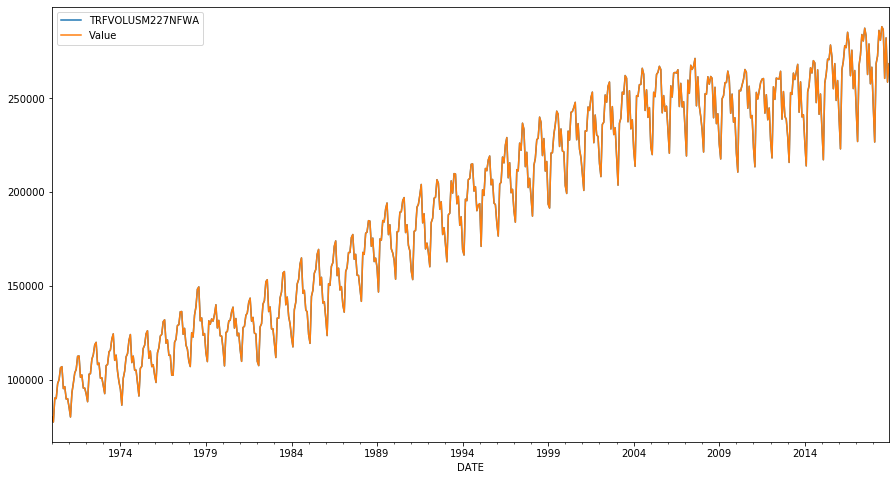

In [12]:
df.plot(figsize=(15,8))

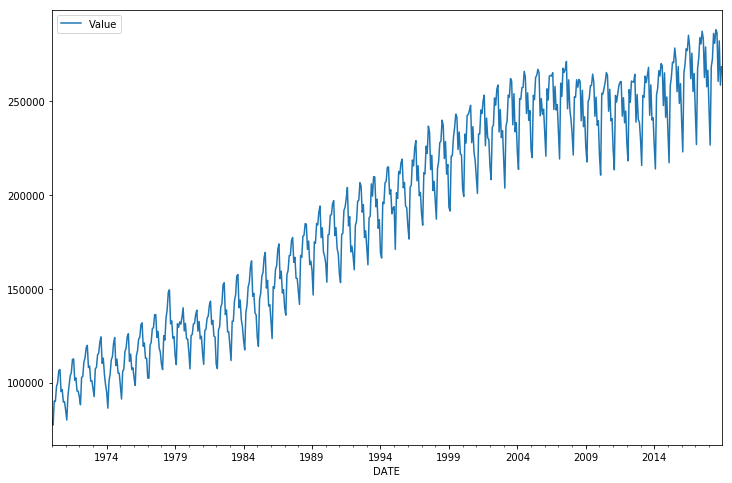

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


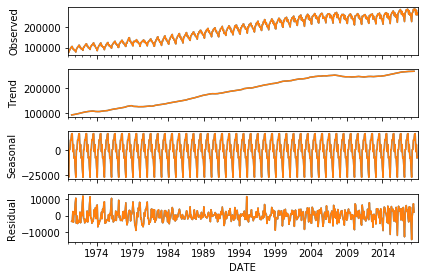

In [14]:
result = seasonal_decompose(df)
result.plot();

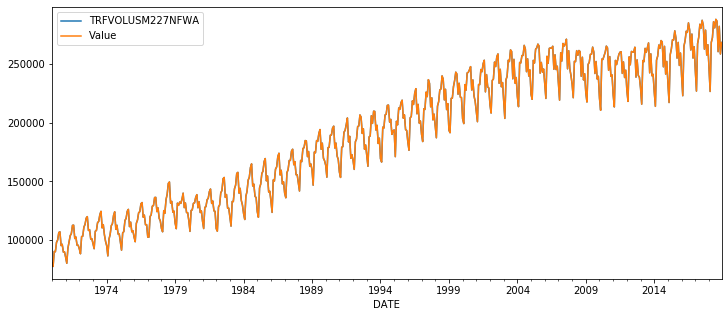

In [16]:
result.observed.plot(figsize=(12,5));

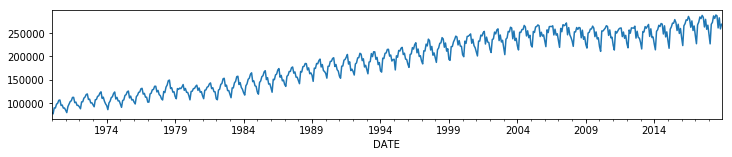

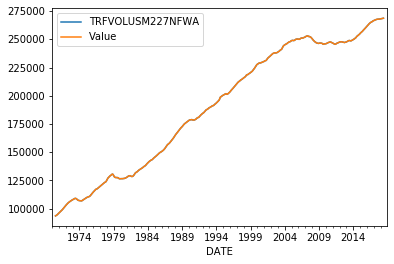

In [17]:
result.trend.plot();

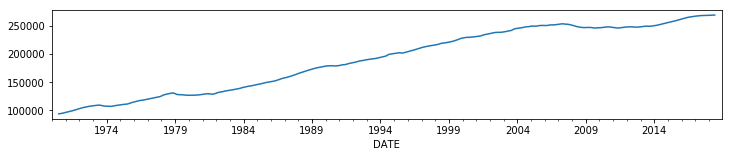

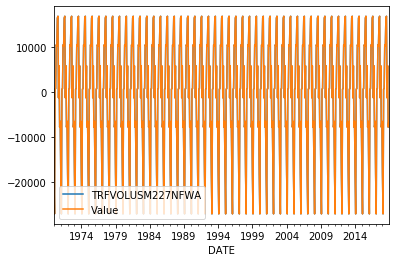

In [18]:
result.seasonal.plot();

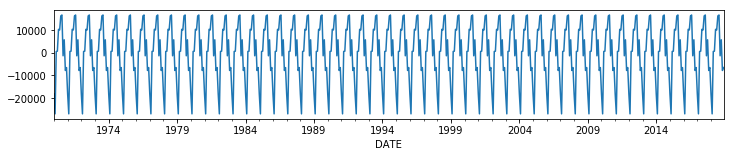

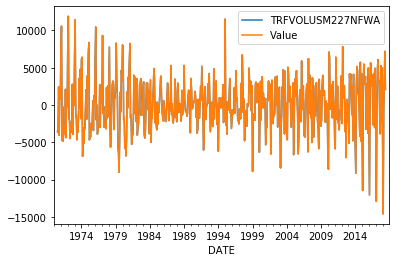

In [19]:
result.resid.plot();

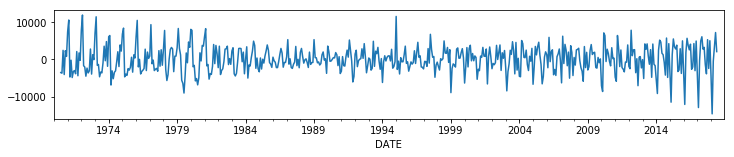

## Train Test Split

**TASK: Figure out the length of the data set**

In [20]:
len(df)

588

In [42]:
train_len = len(df)-12

In [32]:
len(train)

576

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [56]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]
len(test)

12

In [57]:
len(train)

576

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [58]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [59]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [60]:
n_input = 24
n_features = 1
gen = TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [37]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [61]:
model = Sequential()
model.add(LSTM(150,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [63]:
model.fit_generator(gen,epochs=30)

Epoch 1/30
552/552 [==============================] - 6s 11ms/step - loss: 0.0138
Epoch 2/30
552/552 [==============================] - 5s 8ms/step - loss: 0.0068
Epoch 3/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0056
Epoch 4/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0061
Epoch 5/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0047
Epoch 6/30
552/552 [==============================] - 7s 13ms/step - loss: 0.0033
Epoch 7/30
552/552 [==============================] - 6s 10ms/step - loss: 0.0025
Epoch 8/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0019
Epoch 9/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0019
Epoch 10/30
552/552 [==============================] - 5s 8ms/step - loss: 0.0016
Epoch 11/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0014
Epoch 12/30
552/552 [==============================] - 5s 9ms/step - loss: 0.0014
Epoch 13/30
552/552 [=

Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

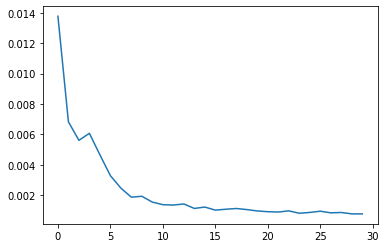

In [64]:
import matplotlib.pyplot as plt
loss = model.history.history['loss']
plt.plot(range(len(loss)),loss)

dict_keys(['loss'])

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [65]:
first_eval = scaled_train[-12:]

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [66]:
first_eval = first_eval.reshape((1,12,n_features))

**TASK: Generate predictions into the same time stamps as the test set**

In [68]:
test_predict = []

first_eval = scaled_train[-n_input:]
current_batch = first_eval.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    test_predict.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [69]:
true_pred = scaler.inverse_transform(test_predict)

array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [71]:
test['Predictions'] = true_pred
test.head()

/home/tim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Value,Predictions
DATE,,
2018-01-01,245695.0,253364.798202
2018-02-01,226660.0,241054.138563
2018-03-01,268480.0,269671.044653
2018-04-01,272475.0,274919.603067
2018-05-01,286164.0,284609.592945


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

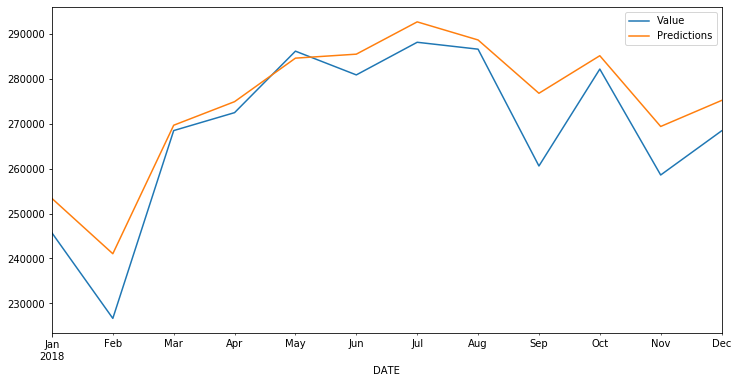

In [72]:
test.plot(figsize=(12,6))

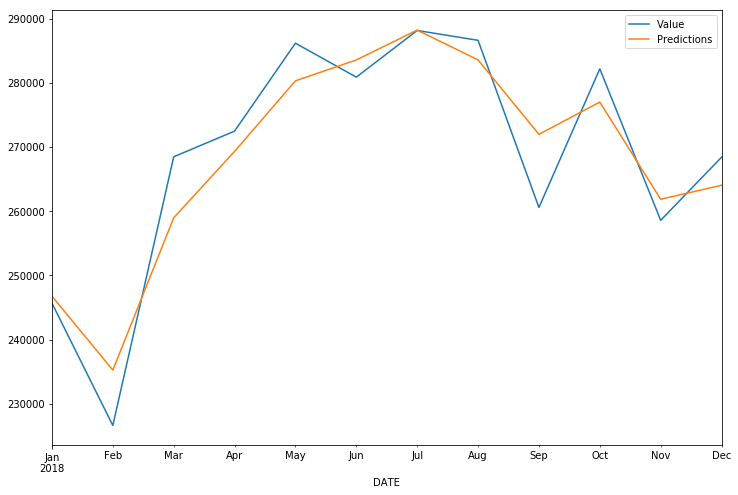

# Saving Models

**TASK: Optional, Save your model!**

In [73]:
model.save('Travel.h5')